# WEEK 26: Session 55 - Feature Selection Part 2 | Wrapper Methods 

https://youtu.be/6-1WiITAW10

# Wrapper Methods : 

- Wrapper methods for feature selection are a type of feature selection methods that involve
using a predictive model to score the combination of features (subset of input columns with y).   
    - eg : combined effect of f1 and f2 on y or f1,f2,f3 on y etc.



- They are called "wrapper" methods because they "wrap" this type of model-based evaluation around the feature
selection process.


- r2 score of each subset with y is calculated. subsets with highest r2 score is selected.

### Steps taken in wrapper method:

1. __Subset Generation :__ First, a subset of features is generated. This can be done in a variety of
ways. For example, you might start with one feature and gradually add more, or start with all
features and gradually remove them, or generate subsets of features randomly. The subset
generation method depends on the specific type of wrapper method being used.


2. __Subset Evaluation :__ After a subset of features has been generated, a model is trained on this
subset of features, and the model's performance is evaluated, usually through cross-
validation. The performance of the model gives an estimate of the quality of the features in
the subset.


3. __Stopping Criterion :__ This process is repeated, generating and evaluating different subsets of
features, until some stopping criterion is met. This could be a certain number of subsets
evaluated, a certain amount of time elapsed, or no improvement in model performance after a
certain number of iterations.

### Types of Wrapper Methods : 

1. Exhaustive feature Selection


2. Forward Selection



3. Backward Selection



4. Recurssive feature Elimination

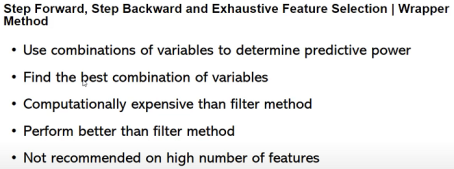

### NOTE: We include machine learning Algorithm while using Wrapper Methods

## Sequential Feature Selection

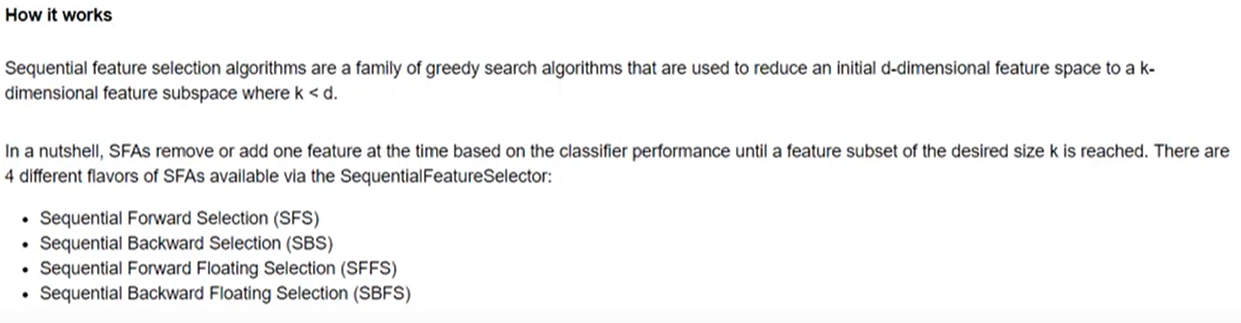

## 1. Exhaustive feature Selection / Best Subset Selection :

- fit the model with all possible combination of input columns


- it requires massive computational power


- use test error to evaluate model performance. 
    - for regression r2 score
    - for classification accuracy

### for n number of columns the total combinations will be $(2^n - 1)$

### Disadvantages of Exhaustive feature Selection
1. __Computational Complexity :__ The biggest drawback is its computational cost. If you have n
features, the number of combinations to check is $2^n -1$. So, as the number of features
grows, the number of combinations grows exponentially, making this method
computationally expensive and time-consuming. For datasets with a large number of
features, it may not be practical.


2. __Risk of Overfitting :__ By checking all possible combinations of features, there's a risk of
overfitting the model to the training data. The feature combination that performs best on
the training data may not necessarily perform well on unseen data.


3. __Requires a Good Evaluation Metric :__ The effectiveness of exhaustive feature selection
depends on the quality of the evaluation metric used to assess the goodness of a feature
subset. If a poor metric is used, the feature selection may not yield optimal results.
eg : instead of adjusted r2 score we are using r2 score

### Logistic example :

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [5]:
lr = LogisticRegression()

In [6]:
sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

In [7]:
model = sel.fit(df.iloc[:,:4],df['species'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

#### 15 models will be trained

In [8]:
model.best_score_ # some subset has best score as 97% accuracy

0.9733333333333334

In [9]:
model.best_feature_names_ # calling the subset

('sepal_width', 'petal_length', 'petal_width')

In [10]:
# detailed output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [11]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


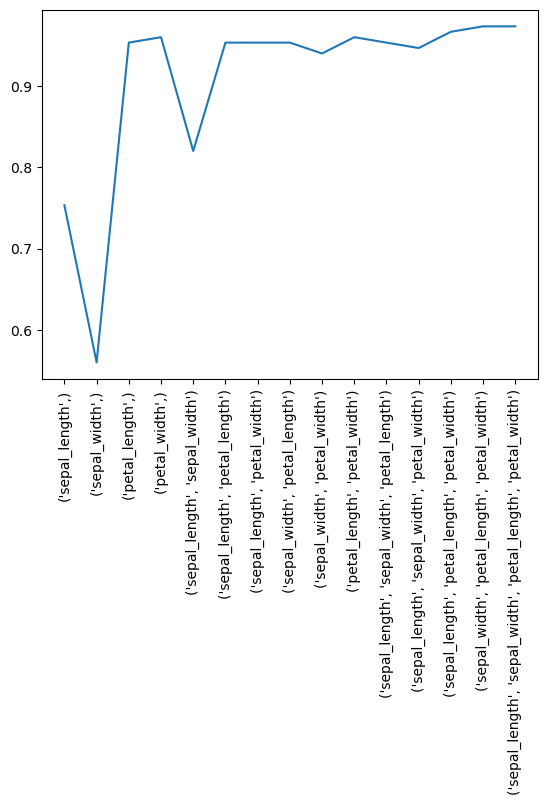

In [12]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

### Regression example

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [16]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16


In [17]:
from sklearn.preprocessing import StandardScaler

#### scale the data :

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### use linear regression without feature selection :

In [ ]:
# baseline model
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()

##### overfitting happening : 

In [19]:
print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096213
testing 0.6514899901155404


#### now applying feature selection:

In [20]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)

Features: 3000/8191IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 7363/8191IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
sel.best_score_

0.6827988156800064

In [22]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [23]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.03941987916919132, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825
1,"(1,)","[0.14236716209182754, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446
2,"(2,)","[0.4055276765549377, 0.0029283993633670846, -0...",0.210465,"(2,)",0.139709,0.188107,0.062702
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(3,)",0.055426,0.074627,0.024876
4,"(4,)","[0.18869831316675012, 0.03113193162308736, 0.0...",0.17746,"(4,)",0.114827,0.154605,0.051535
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861516, 0.5762263847142647, 0.435...",0.679213,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.096133,0.129436,0.043145
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752513, 0.5384374917854683, 0.458...",0.679018,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.098986,0.133276,0.044425
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8494627278072391, 0.5454006150975996, 0.444...",0.66547,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.099036,0.133343,0.044448
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451423, 0.5448662375728603, 0.449...",0.670075,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.094633,0.127415,0.042472


In [24]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

#### calculating adjusted r2 score as r2 score for this many columns is not reliable

In [25]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [26]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291968, 0.574222004970785, 0.4377...",0.682799,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.096995,0.130595,0.043532,404,10,0.674728
7408,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.8717831363927702, 0.5819307800982587, 0.462...",0.680483,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.090811,0.122269,0.040756,404,9,0.673185
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985806, 0.575224578938126, 0.4382...",0.681125,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.096068,0.129348,0.043116,404,11,0.672177
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119794, 0.5381382515761792, 0.461...",0.680994,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.098795,0.133019,0.04434,404,11,0.672043
8153,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8853169531726776, 0.57517618220459, 0.43489...",0.680914,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.097075,0.130703,0.043568,404,11,0.67196
...,...,...,...,...,...,...,...,...,...,...
53,"(3, 11)","[0.07227421305699011, -0.026141441832760126, 0...",0.073485,"(3, 11)",0.069934,0.09416,0.031387,404,2,0.068864
11,"(11,)","[0.1200629474726852, 0.03143835749752166, -0.0...",0.068712,"(11,)",0.071116,0.095752,0.031917,404,1,0.066396
49,"(3, 7)","[-0.0371219722713414, -0.16717603954279991, 0....",0.057453,"(3, 7)",0.09446,0.127183,0.042394,404,2,0.052752
7,"(7,)","[0.004822573124353857, -0.09518844023749029, -...",0.038815,"(7,)",0.066813,0.089958,0.029986,404,1,0.036424


In [27]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [28]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124479


## 2. Sequential Backward Selection/ Elimination 

Starts with the full set of features and eliminates them one at a time, removing the one that has the least impact on the model performance.


##### number of iteration = number of features


$$\text{total number of models} = \frac{n (n + 1)}{2}$$

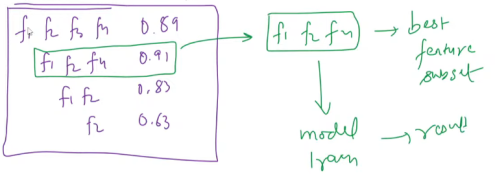

#### faster than exhaustive

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [53]:
# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [54]:
# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

In [55]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [56]:
print(X_train.shape)

(404, 13)


In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096213
testing 0.6514899901155404


In [59]:
lr = LinearRegression()

#### perform backward elimination : doing forward = False

In [60]:
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [61]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [62]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817178, 0.6920238509138779, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,404,13,0.692596
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710696, 0.6944570477695307, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,404,12,0.696781
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7547108925568491, 0.6959627893665095, 0.701...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,404,11,0.699918
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905564, 0.6884741223718952, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069,404,9,0.69757
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818695, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992,404,8,0.691605
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750726, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009,404,7,0.686794
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224,404,6,0.681258
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504308, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931,404,5,0.677058
4,"(5, 7, 10, 12)","[0.7384743962575443, 0.6401188507668831, 0.587...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658,404,4,0.659161


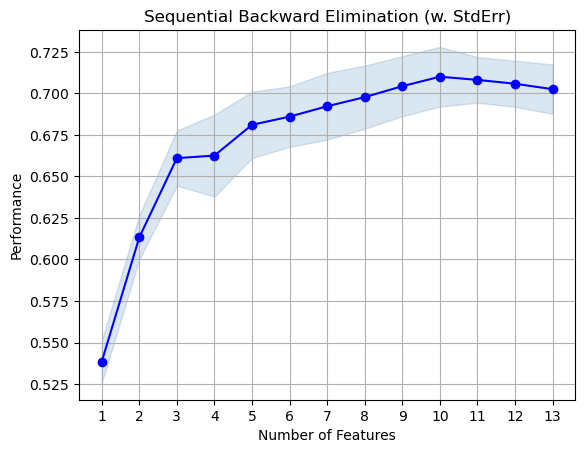

In [63]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [64]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124479


In [65]:
X_train_sel.shape

(404, 10)

### using sklearn

In [66]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [67]:
sfs2 = SFS(model,
           n_features_to_select=5,
           direction='backward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

In [68]:
sfs2 = sfs2.fit(X_train, y_train)

In [69]:
np.arange(X.shape[1])[sfs2.support_]

array([ 4,  5,  7, 10, 12])

###  Disadvantages of Backward elimination : 

1. we are removing  the worst in each iteration i.e doing local selection. we can miss the best.
    - the feature eliminated at first stage may have made the best model with other feature when put in pair. But we already eliminated it before going to next stage.

## 3. Sequential forward feature Selection

- we start with 0 columns and build the model.


- then add columns one by one. first we use one single column from the columns. try each combination.


- after selecting 1st column then make all combinations of 2nd column with the first one


$$\text{total number of models} = \frac{n (n + 1)}{2}$$

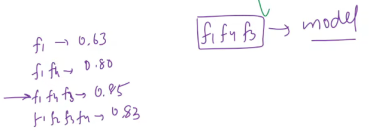

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [71]:
# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [72]:
# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

In [73]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [74]:
print(X_train.shape)

(404, 13)


In [75]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096213
testing 0.6514899901155404


In [77]:
lr = LinearRegression()

#### perform forward elimination : doing forward = True


In [78]:
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [79]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [80]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742,404,1,0.537303
2,"(5, 12)","[0.6330856272904801, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252,404,2,0.61133
3,"(5, 10, 12)","[0.7215896884753016, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568,404,3,0.65847
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,404,4,0.664048
5,"(5, 7, 10, 11, 12)","[0.7440756174774328, 0.6473449858158778, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,404,5,0.667369
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494643, 0.6695521143038105, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,404,6,0.680869
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310515, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,404,7,0.685844
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,404,8,0.689274
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,404,9,0.696996
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905564, 0.6884741223718952, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654


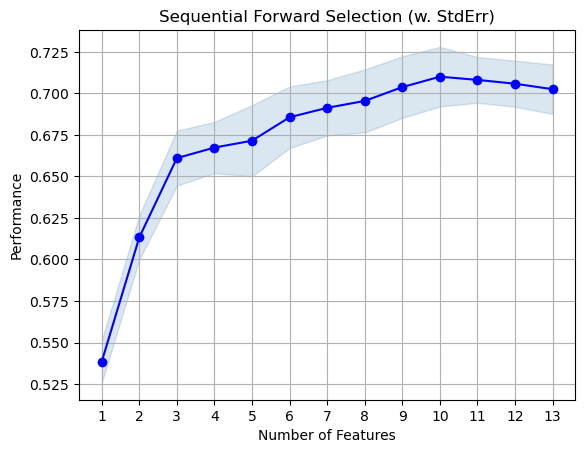

In [82]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [83]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124479


In [84]:
X_train_sel.shape

(404, 10)

### using sklearn

In [85]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [86]:
sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

In [87]:
sfs2 = sfs2.fit(X_train, y_train)

In [88]:
np.arange(X.shape[1])[sfs2.support_]

array([ 5,  7, 10, 11, 12])

###  Disadvantages of Forward selection : 

1. we are selecting  the best in each iteration i.e doing local selection. we can miss the best.
    - the feature not selected at first stage may have made the best model with other feature when put in pair. But we already eliminated it before going to next stage.

## When to use backward or forward?

- when you have 553 columns and you want best 550 columns: __use backward elimination__


- when you have 553 columns and you want best 10 columns: __use forward elimination__

## 4. Recursive Feature Elimination


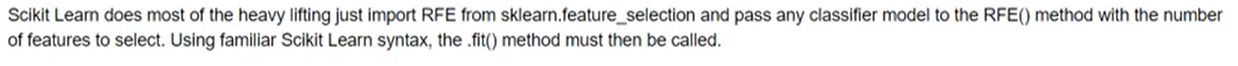

- Recursive Feature Elimination (RFE) is a technique used for feature selection to improve the performance of machine learning models by reducing overfitting and increasing their interpretability. 


- It is particularly useful when dealing with datasets that contain a large number of features or variables.


- Recursive Feature Elimination helps in identifying the most important features in the dataset while discarding the least relevant ones. It essentially works as a backward selection process where features are eliminated based on their impact on the model's performance. 


- RFE is compatible with various types of machine learning algorithms, making it a versatile and widely used technique in feature selection and dimensionality reduction, especially in complex data analysis tasks.

### The RFE method operates as follows:

1. __Step 1: Model Training__
   - RFE starts by training the model on the entire set of features.


2. **Step 2: Feature Importance Ranking**
   - After the initial model training, the importance of each feature is determined based on a specified metric such as coefficients in linear models or feature importances in tree-based models.


3. **Step 3: Feature Elimination**
   - The least important feature(s) are eliminated from the feature set. This removal could be a single feature or a set of features, depending on the specified criteria.


4. **Step 4: Model Retraining**
   - The model is retrained on the reduced feature set.


5. **Step 5: Iterative Process**
   - Steps 2 to 4 are repeated recursively until a predetermined number of features is reached or until the model performance metric (such as accuracy, precision, or any other relevant metric) no longer improves.


6. **Final Model Selection**
   - Once the recursion process is complete, the final set of features that resulted in the best model performance is selected.



In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [43]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

#### feature importance of RandomForest :

In [45]:
rf.feature_importances_

array([0.09712228, 0.02254777, 0.48148775, 0.3988422 ])

In [46]:
dict(zip(X.columns, rf.feature_importances_))

{'sepal_length': 0.09712228069777909,
 'sepal_width': 0.022547771120303865,
 'petal_length': 0.4814877501894448,
 'petal_width': 0.39884219799247217}

##### sepal_width has lowest importance. so dropping it.

In [47]:
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [48]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [49]:
rf.feature_importances_

array([0.19365498, 0.35494836, 0.45139666])

In [50]:
dict(zip(X.columns, rf.feature_importances_))

{'sepal_length': 0.19365497753399175,
 'petal_length': 0.35494836065579616,
 'petal_width': 0.4513966618102121}

##### sepal_length has lowest importance. so dropping it.

In [51]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [52]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [53]:
rf.feature_importances_

array([0.50008258, 0.49991742])

In [54]:
dict(zip(X.columns, rf.feature_importances_))

{'petal_length': 0.5000825791035536, 'petal_width': 0.49991742089644636}

##### petal_length has lowest importance. so dropping it.

In [55]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


### doing same using RFE class in Sklearn:

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [57]:
# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

In [58]:
X.shape, y.shape

((150, 4), (150,))

In [59]:
# Initialize RandomForestClassifier
model = RandomForestClassifier()

#### n_features_to_select means how many features you want

In [60]:
# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=1)

In [61]:
# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")

Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 2
petal_width: 1


### Rfecv gives better result than normal RFE

- __Rfecv is a variation of RFE__

> Recursive feature elimination with __cross-validation__ to select features.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [ ]:
>>> from sklearn.datasets import make_friedman1
>>> from sklearn.feature_selection import RFECV
>>> from sklearn.svm import SVR
>>> X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
>>> estimator = SVR(kernel="linear")

##### NOTE : step tell how many features will be eliminated in each step

In [ ]:
>>> selector = RFECV(estimator, step=1, cv=5)

In [63]:
>>> selector = selector.fit(X, y)
>>> selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [64]:
>>> selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

## Advantages of Wrapper Methods:


1. __Accuracy :__ Wrapper methods usually provide the best performing feature subset for a
given machine learning algorithm because they use the predictive power of the algorithm
itself for feature selection. Better than filter methods


2. __Interaction of Features :__  They consider the interaction of features. While filter methods
consider each feature independently, wrapper methods evaluate subsets of features
together. This means that they can find groups of features that together improve the
performance of the model, even if individually these features are not strong predictors.


## Disadvantages of Wrapper Methods:


1. __Computational Complexity :__ The main downside of wrapper methods is their
computational cost. As they work by generating and evaluating many different subsets of
features, they can be very time-consuming, especially for datasets with a large number of
features.


2. __Risk of Overfitting :__ Because wrapper methods optimize the feature subset to maximize
the performance of a specific machine learning model, they might select a feature subset
that performs well on the training data but not as well on unseen data, leading to
overfitting.


3. __Model Specific :__ The selected feature subset is tailored to maximize the performance of
the specific model used in the feature selection process. Therefore, this subset might not
perform as well with a different type of model.

## Cheatsheet when to use which Wrapper method:

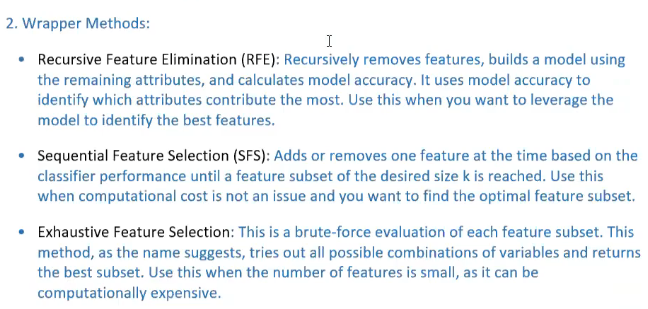